# Completeness relation with numerical Siegert states

The different types of states of the numerical basis set have been presented in the previous notebook, let us use them to study the completeness relation (CR). The same two tests as in the notebook about the completeness of a basis set made of bound and continuum will be presented: a Gaussian test function will used, with or without an initial momentum.

## Initialization

There should be nothing new in this section.

### Import classes and modules

In [1]:
from siegpy import (SWPotential, SWPBasisSet, Gaussian,
                    Hamiltonian, ErfKGCoordMap, BasisSet)
# We also import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Define a potential

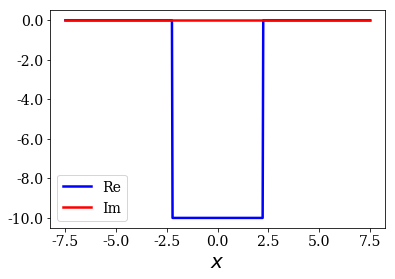

In [2]:
# Read the analytical basis set made of Siegert states
siegerts = SWPBasisSet.from_file("siegerts.dat")

# Find its potential, and discretize it over a grid
pot = siegerts.potential
l = pot.width
xmax = 7.5
xgrid = np.linspace(-xmax, xmax, 501)
pot.grid = xgrid
pot.plot()

### Solve a Hamiltonian to create a basis set

In [3]:
# Initialize a coordinate mapping
x0 = 6.0
lbda = 1.5
cm = ErfKGCoordMap(0.6, x0, lbda)

# Initialize the Hamiltonian with the potential and the coordinate mapping
ham = Hamiltonian(pot, cm)

# Solve the Hamiltonian
basis_filtered = ham.solve(max_virial=3*10**(-6))

## Test function without an initial momentum

We start by defining the test function:

### Definition of the test function

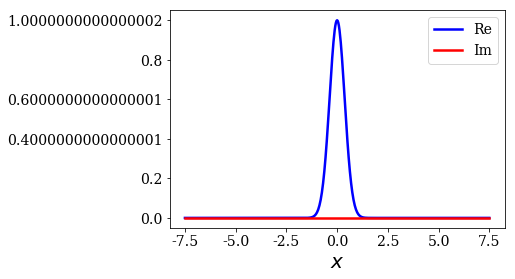

In [4]:
g = Gaussian(l/12, 0, grid=xgrid)
g.plot()

### Comparison with the analytical Berggren expansion

Only the bound and resonant states are found numerically, so it is not possible to compare directly the numerical results with the analytical Mittag-Leffler expansion of the CR using the `Berggren_completeness_convergence` method. However, it is possible to compare with the analytical Berggren expansion of the CR. We use the exact CR using the analytical bound and continuum states as a reference.

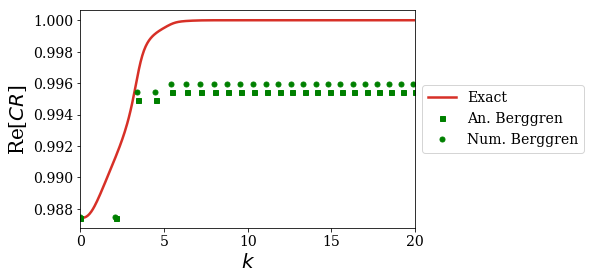

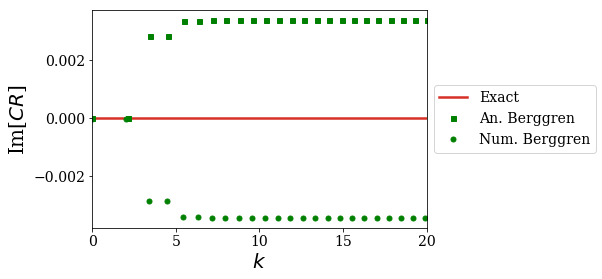

In [5]:
# Compute the Berggren expansion completeness convergence numerically
kgrid_Ber_num, CR_conv_Ber_num = basis_filtered.Berggren_completeness_convergence(g)
# Compute the Berggren expansion completeness convergence analytically
kgrid_Ber_an, CR_conv_Ber_an = siegerts.Berggren_completeness_convergence(g, nres=25)
# Use only a limited range of continuum states for the exact CR
kgrid_exact, CR_conv_exact = siegerts.exact_completeness_convergence(g, hk=0.05, kmax=20)
# Set the plot of the real part of the CR
plt.plot(kgrid_exact, np.real(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_Ber_an, np.real(CR_conv_Ber_an), label='An. Berggren', ls='', marker='s', ms=5, color='g')
plt.plot(kgrid_Ber_num, np.real(CR_conv_Ber_num), label='Num. Berggren', ls='', marker='.', ms=10, color='g')
plt.xlabel("$k$")
plt.ylabel("Re[$CR$]")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()
# Set the plot of the imaginary part of the CR
plt.plot(kgrid_exact, np.imag(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_Ber_an, np.imag(CR_conv_Ber_an), label='An. Berggren', ls='', marker='s', ms=5, color='g')
plt.plot(kgrid_Ber_num, np.imag(CR_conv_Ber_num), label='Num. Berggren', ls='', marker='.', ms=10, color='g')
plt.xlabel("$k$")
plt.ylabel("Im[$CR$]")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()

As expected, the Berggren expansion of the completeness relation gives a complex result and does not compare to the analytical exact result. Still, the agreement with the analytical Berggren expansion is very good: this quantifies the quality of the numerical Siegert states compared to the analytical ones.

The question now is: **what is the influence of the states of unknown type on the completeness relation?** This question can be answered by applying the `completeness_convergence` method on the filtered basis set (where the contribution of all the states of unknown type is added to the bound states contributions of the CR; this only amounts to a translation of the Berggren expansion of the CR). This result is then compared with the analytical exact CR and the analytical MLE of the CR:

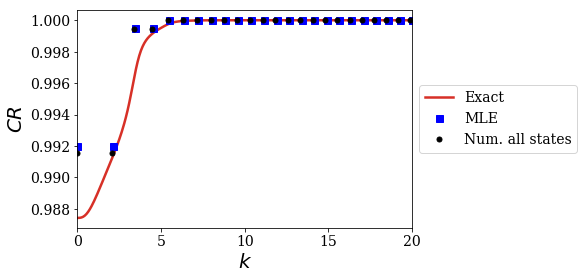

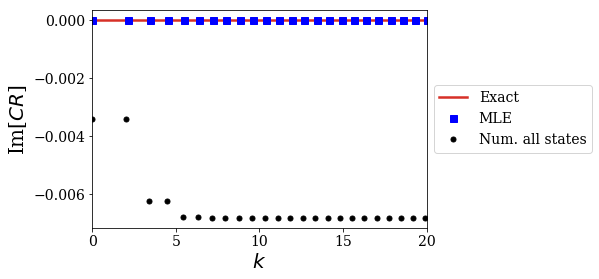

In [6]:
# Use only a limited number of Siegert states to find the analytical MLE of the CR
kgrid_MLE, CR_conv_MLE = siegerts.MLE_completeness_convergence(g, nres=25)
# Use all the numerical eigenstates of low virial
kgrid_num, CR_conv_num = basis_filtered.completeness_convergence(g)
# Set the plot of the real part of the CR
plt.plot(kgrid_exact, np.real(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.real(CR_conv_MLE), label='MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_num, np.real(CR_conv_num), label='Num. all states', ls='', marker='.', ms=10, color='k')
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()
# Set the plot of the imaginary part of the CR
plt.plot(kgrid_exact, np.imag(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.imag(CR_conv_MLE), label='MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_num, np.imag(CR_conv_num), label='Num. all states', ls='', marker='.', ms=10, color='k')
plt.xlabel("$k$")
plt.ylabel("Im[$CR$]")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()

The numerical results very nicely fit the analytical MLE of the CR! It is as if the states of unkown type give the remaining contribution leading to the Mittag-Leffler Expansion of the CR. For instance, see how the imaginary part of all the non-resonant states exactly compensate the imaginary part of the resonant states contributions.

The question now is: **which are the states of unknown type that account for this compensation?**

One could think of the Siegert states of unknown type with the lowest virial:

In [7]:
basis_lower_filter_1 = BasisSet(states=[s for s in basis_filtered if np.abs(s.virial) < 8*10**(-6)])
len(basis_lower_filter_1), len(basis_lower_filter_1.resonants)

(42, 30)

The basis set is now smaller, and the extra states correspond to states that we could already easily consider as resonant states:

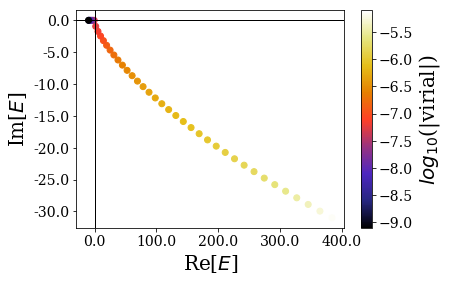

In [8]:
basis_lower_filter_1.plot_energies()

Let us look at the impact on the completeness relation of these extra resonant states:

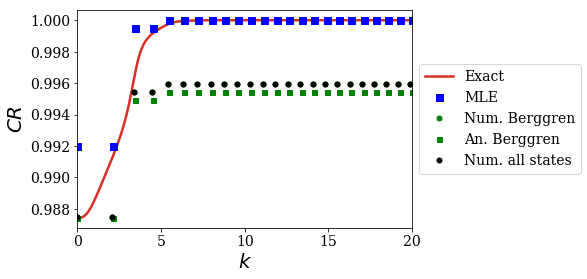

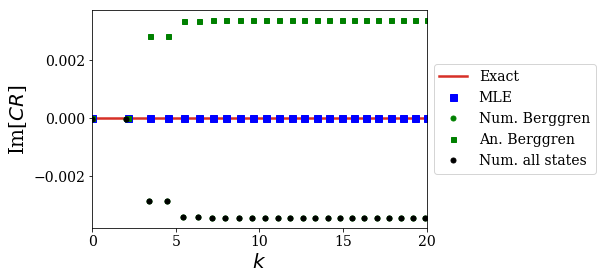

In [9]:
# Use all the numerical eigenstates of low virial
kgrid_num_lower_1, CR_conv_num_lower_1 = basis_lower_filter_1.completeness_convergence(g)
# Set the plot of the real part of the CR
plt.plot(kgrid_exact, np.real(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.real(CR_conv_MLE), label='MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_Ber_num, np.real(CR_conv_Ber_num), label='Num. Berggren', ls='', marker='.', ms=10, color='g')
plt.plot(kgrid_Ber_an, np.real(CR_conv_Ber_an), label='An. Berggren', ls='', marker='s', ms=5, color='g')
plt.plot(kgrid_num_lower_1, np.real(CR_conv_num_lower_1), label='Num. all states', ls='', marker='.', ms=10, color='k')
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()
# Set the plot of the imaginary part of the CR
plt.plot(kgrid_exact, np.imag(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.imag(CR_conv_MLE), label='MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_Ber_num, np.imag(CR_conv_Ber_num), label='Num. Berggren', ls='', marker='.', ms=10, color='g')
plt.plot(kgrid_Ber_an, np.imag(CR_conv_Ber_an), label='An. Berggren', ls='', marker='s', ms=5, color='g')
plt.plot(kgrid_num_lower_1, np.imag(CR_conv_num_lower_1), label='Num. all states', ls='', marker='.', ms=10, color='k')
plt.xlabel("$k$")
plt.ylabel("Im[$CR$]")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()

This means that using more resonant states in the expansion keeps on giving results that are close to the analytical Berggren expansion of the CR. This is actually not that suprising.

**What happens if the virial limit is set to a higher value?**

In [10]:
basis_lower_filter_2 = BasisSet(states=[s for s in basis_filtered if np.abs(s.virial) < 1.5*10**(-3)])
len(basis_lower_filter_2), len(basis_lower_filter_2.resonants)

(81, 30)

The basis set is then larger, and the extra states correspond to more states that could be considered as resonant states and also some states that are located along the imaginary axis of energy:

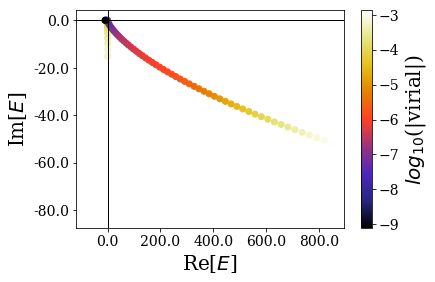

In [11]:
basis_lower_filter_2.plot_energies(show_unknown=True)

Let us look at their impact on the expansion of the completeness relation:

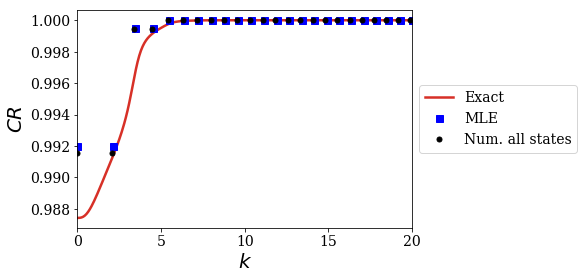

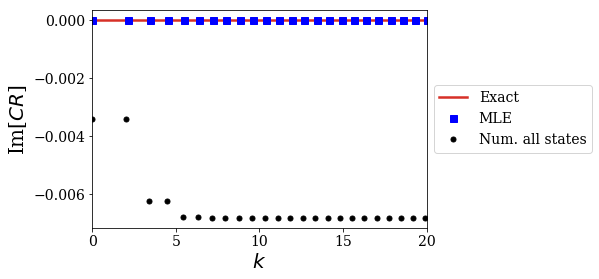

In [12]:
# Use all the numerical eigenstates of low virial
kgrid_num_lower_2, CR_conv_num_lower_2 = basis_lower_filter_2.completeness_convergence(g)
# Set the plot of the real part of the CR
plt.plot(kgrid_exact, np.real(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.real(CR_conv_MLE), label='MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_num_lower_2, np.real(CR_conv_num_lower_2), label='Num. all states', ls='', marker='.', ms=10, color='k')
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()
# Set the plot of the imaginary part of the CR
plt.plot(kgrid_exact, np.imag(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.imag(CR_conv_MLE), label='MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_num_lower_2, np.imag(CR_conv_num_lower_2), label='Num. all states', ls='', marker='.', ms=10, color='k')
plt.xlabel("$k$")
plt.ylabel("Im[$CR$]")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()

These states of low virial along the imaginary axis are the relevant ones to reproduce the MLE of the CR! This means it is not relevant to only look for the resonant states when solving the numerical Hamiltonian, but any state of low virial is sufficient, whether they truly are Siegert states or not.

One way of separating them from the other states of unknown types that could be considered as resonant states is by looking for states with small real energies. Let us look at the wavefunctions of some of them:

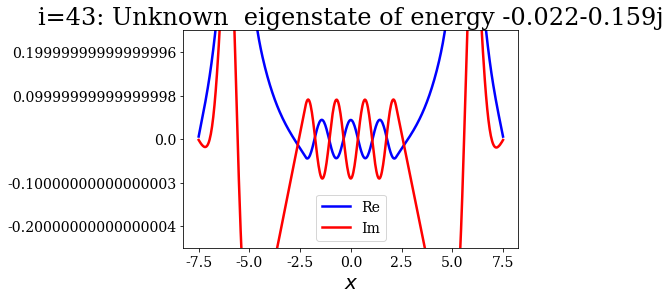

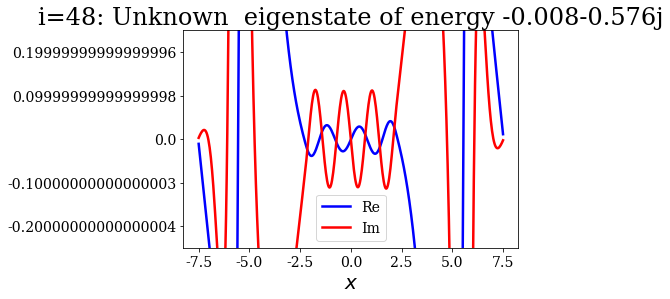

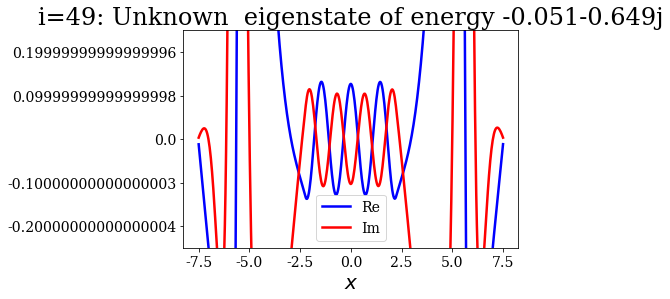

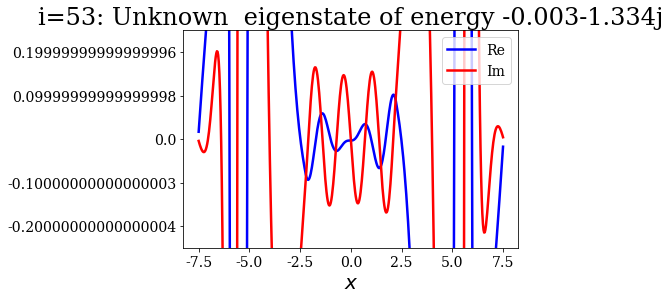

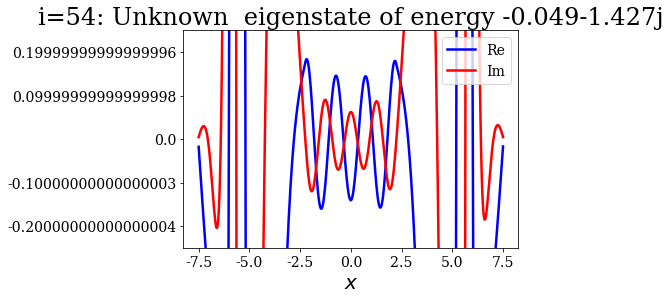

In [13]:
# Find the real energy of the last resonant state of the basis set
max_re = max([s.energy.real for s in basis_lower_filter_2.resonants])
# Plot the first 5 states whose energies are along the imaginary axis
max_states = 5
counter = 0
for i in range(43, len(basis_lower_filter_2)):
    if basis_lower_filter_2[i].energy < max_re and counter < max_states:
        counter += 1
        basis_lower_filter_2[i].plot(ylim=(-0.25, 0.25),
                                     title="i={}: {}".format(i, basis_lower_filter_2[i]))

Theses states actually look like the numerical continuum states, in terms of nodes in each region (inside or outside the potential). It is as if the coordinate mapping was forcing them to rotate, leaving them with complex wavefunctions.

Interestingly, their contribution to the completeness relation is important: it would be interesting to see how this would be influenced by the grid step of the potential.

## Test function with an initial momentum

Let us now move to the case of a test function with an initial momentum:

### Definition of the test function

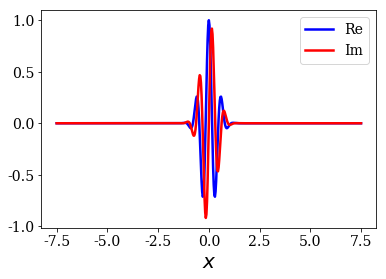

In [14]:
g_k0 = Gaussian(l/12, 0, k0=10, grid=xgrid)
g_k0.plot()

### Comparison with analytical results

The convergence of the completeness relation in the same manner as in the first case:

* Analytically, using the MLE or the Berggren expansions and the exact expansion using bound and continuum states as references,

* Numerically, using the Berggren expansion or using all the states in the basis set.

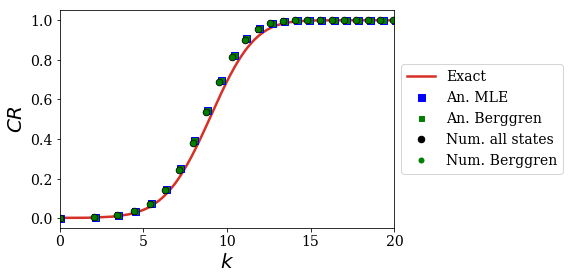

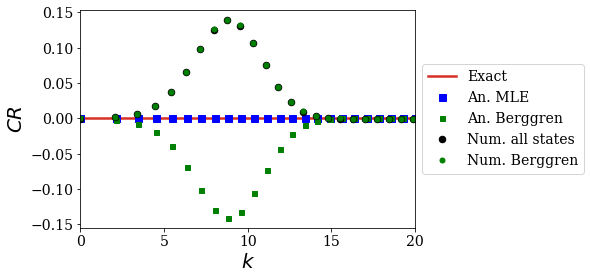

In [15]:
# Use only a limited number of Siegert states to find the analytical MLE of the CR
kgrid_MLE, CR_conv_MLE = siegerts.MLE_completeness_convergence(g_k0, 25)
# Use only a limited range of continuum states for the exact CR
kgrid_exact, CR_conv_exact = siegerts.exact_completeness_convergence(g_k0, hk=0.05, kmax=20)
# Use all the numerical eigenstates of low virial
kgrid_num, CR_conv_num = basis_filtered.completeness_convergence(g_k0)
# Compute the Berggren expansion completeness convergence numerically
kgrid_Ber_num, CR_conv_Ber_num = basis_filtered.Berggren_completeness_convergence(g_k0)
# Compute the Berggren expansion completeness convergence analytically
kgrid_Ber_an, CR_conv_Ber_an = siegerts.Berggren_completeness_convergence(g_k0, nres=25)
# Set the plot
plt.plot(kgrid_exact, np.real(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.real(CR_conv_MLE), label='An. MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_Ber_an, np.real(CR_conv_Ber_an), label='An. Berggren', ls='', marker='s', ms=5, color='g')
plt.plot(kgrid_num, np.real(CR_conv_num), label='Num. all states', ls='', marker='.', ms=13, color='k')
plt.plot(kgrid_Ber_num, np.real(CR_conv_Ber_num), label='Num. Berggren', ls='', marker='.', ms=10, color='g')
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()
# Set the plot
plt.plot(kgrid_exact, np.imag(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_MLE, np.imag(CR_conv_MLE), label='An. MLE', ls='', marker='s', ms=7, color='b')
plt.plot(kgrid_Ber_an, np.imag(CR_conv_Ber_an), label='An. Berggren', ls='', marker='s', ms=5, color='g')
plt.plot(kgrid_num, np.imag(CR_conv_num), label='Num. all states', ls='', marker='.', ms=13, color='k')
plt.plot(kgrid_Ber_num, np.imag(CR_conv_Ber_num), label='Num. Berggren', ls='', marker='.', ms=10, color='g')
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.xlim(0, 20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.show()

In this case, the numerical expansion is not really affected by the extra states, since both numerical expansions superimpose. This means that the expansion found numerically is related to the Berggren expansion rather than the Mittag-Leffler expansion. This could be a little disturbing, but remember that it was shown in the notebook treating the time-propagation of an initial state with an initial momentum that a Berggren expansion could very well approximate such a phenomenon: the numerical Siegert states found here should produce correct result when used in thetime-propagation context.

## Conclusion

This notebook focused on the completeness relation, and it was shown that filtering the states with the lowest virial values made it possible to use only a limited number of states to describe the completeness relation in a similar manner as in the analytical case.